## Wczytywanie danych


In [1]:
from google.colab import files
import pandas as pd
import numpy as np


uploaded = files.upload()
filename = next(iter(uploaded))

df = pd.read_csv(filename)


Saving tortilla_prices_raw.csv to tortilla_prices_raw.csv


In [2]:
# Wczytanie danych do zmiennej, gdy plik został już wcześniej przesłany
df = pd.read_csv('/content/tortilla_prices_raw.csv')

## Wypisanie próbki wczytanych danych

In [3]:
print(df.head())

                 State            City  Year  Month  Day         Store type  \
0       Aguascalientes  Aguascalientes  2007      1   10  Mom and Pop Store   
1      Baja California        Mexicali  2007      1   10  Mom and Pop Store   
2      Baja California         Tijuana  2007      1   10  Mom and Pop Store   
3  Baja California Sur          La Paz  2007      1   10  Mom and Pop Store   
4             Campeche        Campeche  2007      1   10  Mom and Pop Store   

   Price per kilogram  
0                 9.9  
1                 NaN  
2                10.0  
3                10.0  
4                10.0  


## Przetwarzanie wstępne danych

In [4]:
df.isnull().any()

State                 False
City                  False
Year                  False
Month                 False
Day                   False
Store type            False
Price per kilogram     True
dtype: bool

In [5]:
# Display null count grouped by columns
print("Rows:", df.shape[0]);

print("\nColumn \t\tnull count");
print("--------------------------");
print(df.isnull().sum());

Rows: 278886

Column 		null count
--------------------------
State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64


Uśrednianie pustych wartości

In [6]:
numeric_cols = df.select_dtypes(include=[np.number])
numeric_means = numeric_cols.mean()
df[numeric_cols.columns] = numeric_cols.fillna(numeric_means)

In [7]:
df.isnull().any()

State                 False
City                  False
Year                  False
Month                 False
Day                   False
Store type            False
Price per kilogram    False
dtype: bool

In [8]:
print(df.head())

                 State            City  Year  Month  Day         Store type  \
0       Aguascalientes  Aguascalientes  2007      1   10  Mom and Pop Store   
1      Baja California        Mexicali  2007      1   10  Mom and Pop Store   
2      Baja California         Tijuana  2007      1   10  Mom and Pop Store   
3  Baja California Sur          La Paz  2007      1   10  Mom and Pop Store   
4             Campeche        Campeche  2007      1   10  Mom and Pop Store   

   Price per kilogram  
0            9.900000  
1           12.054586  
2           10.000000  
3           10.000000  
4           10.000000  


Kodowanie etykiet

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['State'] = encoder.fit_transform(df['State'])
df['City'] = encoder.fit_transform(df['City'])
df['Store type'] = encoder.fit_transform(df['Store type'])

In [10]:
print(df.head())

   State  City  Year  Month  Day  Store type  Price per kilogram
0      0     1  2007      1   10           1            9.900000
1      1    24  2007      1   10           1           12.054586
2      1    43  2007      1   10           1           10.000000
3      2    21  2007      1   10           1           10.000000
4      3     2  2007      1   10           1           10.000000


## Ewaluacja danych



In [11]:
print(round(df['Price per kilogram'].describe(), 2))

count    278886.00
mean         12.05
std           4.29
min           0.00
25%           9.62
50%          11.25
75%          14.00
max          31.00
Name: Price per kilogram, dtype: float64


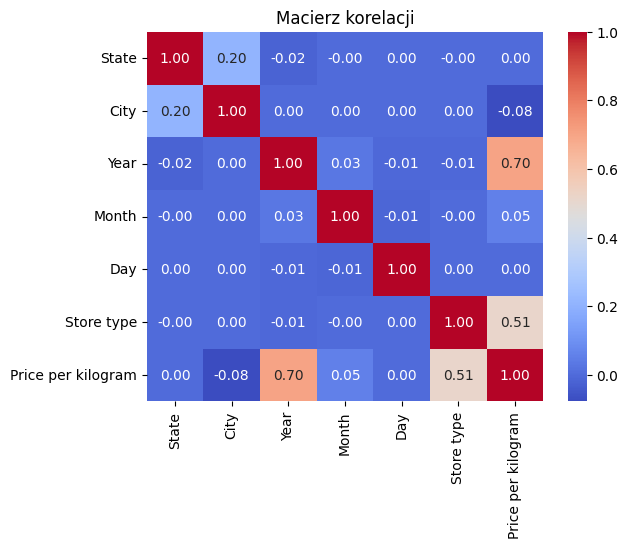

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

In [13]:
df["Price per kilogram"].groupby([df["Year"]]).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2007,16377.0,7.471039,1.836033,3.87,5.80,8.000000,8.83,12.054586
2008,15808.0,7.622002,1.957513,4.03,5.80,7.800000,9.50,13.000000
2009,15184.0,8.094949,2.074020,0.00,6.27,7.770000,10.00,13.000000
2010,15645.0,8.670437,2.170485,5.07,6.87,8.000000,11.00,13.800000
2011,15750.0,9.737406,2.345454,5.80,7.67,8.970000,12.00,15.500000
2012,17360.0,11.280149,2.057119,7.33,9.63,10.900000,13.22,16.500000
2013,17360.0,11.723217,1.934786,7.33,10.23,11.200000,13.50,17.330000
2014,17136.0,11.624461,2.097390,7.50,9.93,11.070000,13.55,17.400000
2015,16576.0,11.632321,2.179127,7.50,9.97,10.630000,14.00,18.000000


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['75%']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('75%', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('75%')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['75%']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('75%', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('75%')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['75%']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('75%', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('75%')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['75%']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('75%', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('75%')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
_df_12['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

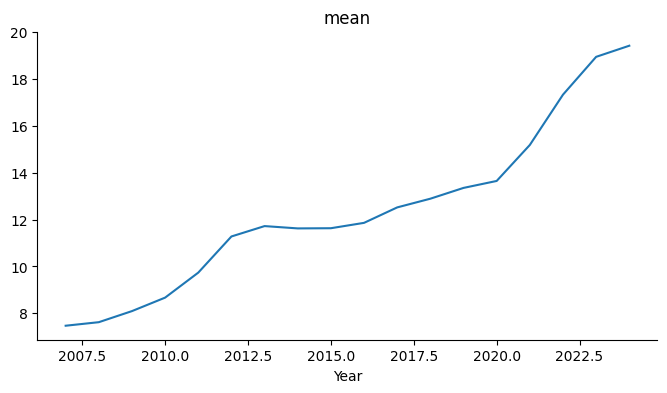

In [23]:
from matplotlib import pyplot as plt
_df_13['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

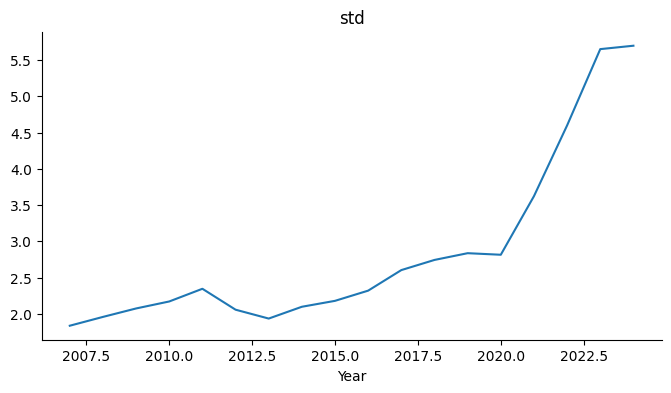

In [24]:
from matplotlib import pyplot as plt
_df_14['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

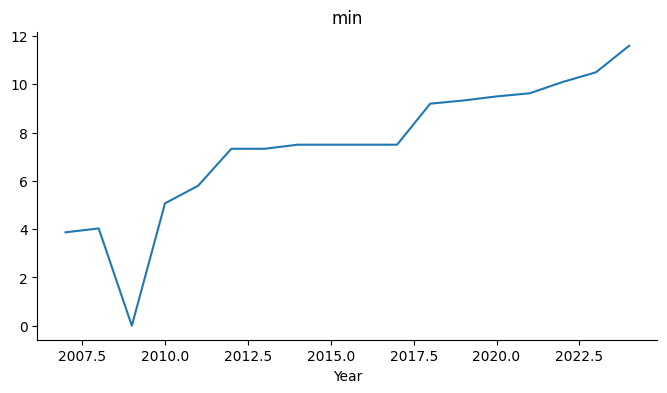

In [25]:
from matplotlib import pyplot as plt
_df_15['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
df["Price per kilogram"].groupby([df["Month"]]).describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,25296.0,12.070929,4.460499,3.87,9.53,11.23,14.00,31.00
2,22893.0,11.878158,4.511112,3.87,9.23,11.00,14.00,31.00
3,23737.0,11.638326,4.205861,4.63,9.00,11.00,13.83,31.00
4,23222.0,11.658676,4.129347,4.72,9.25,10.93,13.97,30.83
5,23980.0,11.757688,4.172308,4.70,9.34,11.00,14.00,30.83
6,24743.0,11.734431,4.099848,4.70,9.50,11.20,13.56,30.83
7,23309.0,12.118705,4.120257,4.75,9.80,11.38,14.00,30.83
8,23643.0,12.273533,4.200591,5.27,9.83,11.50,14.00,30.83
9,21581.0,12.392626,4.346781,0.00,9.83,11.43,14.14,30.83


## Podział danych

Import

In [15]:
from sklearn.model_selection import train_test_split

Podział danych na zestaw treningowy i testowy

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price per kilogram', axis=1), df['Price per kilogram'], test_size=0.15, random_state=42)

Podział zestawu treningowego na treningowy i walidacyjny

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=42)

Sprawdzenie rozmiarów zestawów danych

In [18]:
print("Rozmiar zestawu treningowego:", X_train.shape)
print("Rozmiar zestawu walidacyjnego:", X_val.shape)
print("Rozmiar zestawu testowego:", X_test.shape)

Rozmiar zestawu treningowego: (195331, 6)
Rozmiar zestawu walidacyjnego: (41722, 6)
Rozmiar zestawu testowego: (41833, 6)


## Uczenie modelu

Importy

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor;

Inicjacja modelu

In [20]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42);

Trenowanie modelu

In [21]:
model.fit(X_train, y_train);

Ewaluacja modelu

In [ ]:
y_pred = model.predict(X_test);
mae = mean_absolute_error(y_test, y_pred);
mse = mean_squared_error(y_test, y_pred);
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae);
print('Mean Squared Error:', mse);
print('R2 Score:', r2)

Mean Absolute Error: 0.4821731192240612
Mean Squared Error: 0.6189800809637956
R2 Score: 0.9667482420870733
